In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from models import Autoencoder
from utils import train_autoencoder, load_mnist

In [3]:
train_data, test_data = load_mnist()

train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=True)

In [4]:
ae = Autoencoder()

optimizer = torch.optim.Adam(ae.parameters(), lr=1e-3)
loss_fn = torch.nn.MSELoss()

In [5]:
train_autoencoder(
    ae,
    train_loader,
    optimizer,
    loss_fn,
    epochs=10,
    device="cpu"
)

Epoch 1/10: average loss = 0.0597
Epoch 2/10: average loss = 0.0296
Epoch 3/10: average loss = 0.0230
Epoch 4/10: average loss = 0.0198
Epoch 5/10: average loss = 0.0178
Epoch 6/10: average loss = 0.0164
Epoch 7/10: average loss = 0.0151
Epoch 8/10: average loss = 0.0141
Epoch 9/10: average loss = 0.0135
Epoch 10/10: average loss = 0.0130


[0.05966389076908429,
 0.029608365510900816,
 0.023027617685993512,
 0.019810628497600555,
 0.017817867489655814,
 0.016388848802447318,
 0.015059242662290731,
 0.01413704490661621,
 0.013482559129595756,
 0.012981011517345905]

In [66]:
# random imputer
def mcar_mask_image(img, missing_rate=0.2):
    if img.dim() == 3:
        C, H, W = img.shape
        mask = torch.rand(C, H, W, device=img.device) > missing_rate
    elif img.dim() == 4:
        B, C, H, W = img.shape
        mask = torch.rand(B, C, H, W, device=img.device) > missing_rate

    masked_img = img.clone()
    masked_img[~mask] = float("nan")

    return masked_img, mask

In [67]:
def mean_impute_image(img):
    x = img.clone()

    if x.dim() == 3:
        C = x.size(0)
        for c in range(C):
            channel = x[c]
            mean_val = torch.nanmean(channel)
            channel[torch.isnan(channel)] = mean_val
    elif x.dim() == 4:
        B, C = x.size(0), x.size(1)
        for b in range(B):
            for c in range(C):
                channel = x[b, c]
                mean_val = torch.nanmean(channel)
                channel[torch.isnan(channel)] = mean_val

    return x


In [90]:
idx = torch.randint(len(train_data), size=(4,)).numpy()
print(idx)

[19497  6764 32118 30322]


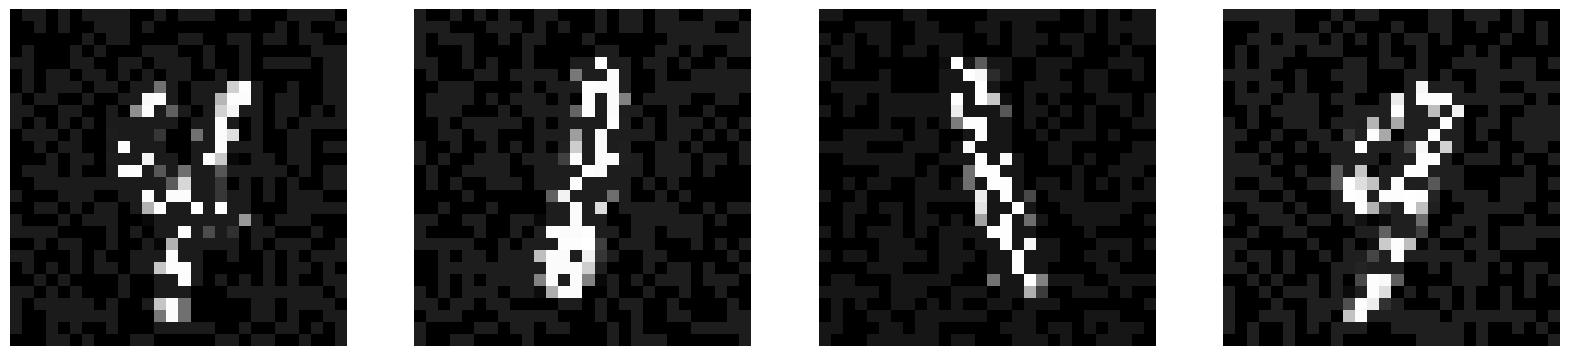

In [105]:
idx = torch.randint(len(train_data), size=(4,1)).numpy()


fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, index in enumerate(idx):
    img, label = train_data[index.item()]

    # Mask and impute pixels
    masked_img, mask = mcar_mask_image(img, missing_rate=0.5)
    imputed_img = mean_impute_image(masked_img)

    axs[i].imshow(imputed_img.squeeze(), cmap="gray")
    axs[i].axis('off')

plt.show()